# linear regression

In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm

In [2]:
data=pd.read_csv("C:\\Users\\prasanna\\OneDrive\\Desktop\\4thsem\\Part A\\1_linear_regression_data.csv")

In [3]:
data.head()

,sales,youtube,facebook,newspaper
0,26.52,276.12,45.36,83.04
1,12.48,53.40,47.16,54.12
2,11.16,20.64,55.08,83.16
3,22.20,181.80,49.56,70.20
4,15.48,216.96,12.96,70.08


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   sales      200 non-null    float64
 1   youtube    200 non-null    float64
 2   facebook   200 non-null    float64
 3   newspaper  200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [5]:
data.describe()

,sales,youtube,facebook,newspaper
count,200.000000,200.000000,200.000000,200.000000
mean,16.827000,176.451000,27.921800,36.664800
std,6.260948,103.025084,17.808436,26.134345
min,1.920000,0.840000,0.360000,0.360000
25%,12.450000,89.250000,11.970000,15.300000
50%,15.480000,179.700000,27.480000,30.900000
75%,20.880000,262.590000,43.830000,54.120000
max,32.400000,355.680000,59.520000,136.800000


In [6]:
X=(data[['youtube','facebook','newspaper']])

In [7]:
Y=data['sales']

In [8]:
X=sm.add_constant(X)

In [9]:
model=sm.OLS(Y,X).fit()

In [10]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     571.0
Date:                Thu, 14 Sep 2023   Prob (F-statistic):           1.40e-96
Time:                        10:26:46   Log-Likelihood:                -422.53
No. Observations:                 200   AIC:                             853.1
Df Residuals:                     196   BIC:                             866.2
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.5212      0.374      9.411      0.0

In [12]:
sales_pred=model.predict(X)

In [19]:
#mape
np.mean(np.abs((Y - sales_pred) / sales_pred)) *100

11.2382980612622

# logistic regression

In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import metrics
import statsmodels.api as sm

In [5]:
data=pd.read_csv("C:\\Users\\prasanna\\OneDrive\\Desktop\\4thsem\\Part A\\2_logistic_regression_data.csv")

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Dependents      150 non-null    object 
 1   tenure          150 non-null    int64  
 2   MonthlyCharges  150 non-null    float64
 3   TotalCharges    150 non-null    float64
 4   Churn           150 non-null    int64  
dtypes: float64(2), int64(2), object(1)
memory usage: 6.0+ KB


In [7]:
data.head()

,Dependents,tenure,MonthlyCharges,TotalCharges,Churn
0,No,1,29.85,29.85,0
1,No,34,56.95,1889.50,0
2,No,2,53.85,108.15,0
3,No,2,70.70,151.65,0
4,No,8,99.65,820.50,0


In [12]:
data.isna().sum()

Dependents        0
tenure            0
MonthlyCharges    0
TotalCharges      0
Churn             0
dtype: int64

In [13]:
modeling_data=pd.get_dummies(data,columns=['Dependents'],drop_first= True)

In [14]:
modeling_data.head()

,tenure,MonthlyCharges,TotalCharges,Churn,Dependents_Yes
0,1,29.85,29.85,0,0
1,34,56.95,1889.50,0,0
2,2,53.85,108.15,0,0
3,2,70.70,151.65,0,0
4,8,99.65,820.50,0,0


In [15]:
Y=modeling_data['Churn']

In [16]:
X=modeling_data.drop(['Churn'],axis=1)

In [17]:
model=sm.Logit(Y.astype(float),X.astype(float)).fit()

Optimization terminated successfully.
         Current function value: 0.105097
         Iterations 11


In [19]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  Churn   No. Observations:                  150
Model:                          Logit   Df Residuals:                      146
Method:                           MLE   Df Model:                            3
Date:                Thu, 14 Sep 2023   Pseudo R-squ.:                  0.8036
Time:                        22:03:43   Log-Likelihood:                -15.765
converged:                       True   LL-Null:                       -80.283
Covariance Type:            nonrobust   LLR p-value:                 8.726e-28
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
tenure            -0.1840      0.051     -3.630      0.000      -0.283      -0.085
MonthlyCharges    -0.2614      0.079     -3.329      0.001      -0.415      -0.108
TotalCharges       0.0066      0.002      3.547      0.000       0.003       0.010
Dependents_Yes     6.8330      1.964      3.480      0.001       2.985      10.681
==================================================================================

Possibly complete quasi-separation: A fraction 0.41 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

In [21]:
pred=model.predict(X)

In [22]:
predicted_churn=[1 if x>0.5 else 0 for x in pred]


In [23]:
print(metrics.classification_report(Y,predicted_churn))

              precision    recall  f1-score   support

           0       0.95      0.97      0.96       116
           1       0.88      0.82      0.85        34

    accuracy                           0.93       150
   macro avg       0.91      0.89      0.90       150
weighted avg       0.93      0.93      0.93       150



# cluster

In [25]:
import pandas as pd
import sklearn.cluster as KMeans
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score

In [27]:
data=pd.read_csv("C:\\Users\\prasanna\\OneDrive\\Desktop\\4thsem\\Part A\\4_kmeas_clustering_data.csv")

In [28]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   x1      20 non-null     int64
 1   x2      20 non-null     int64
 2   x3      20 non-null     int64
 3   x4      20 non-null     int64
 4   x5      20 non-null     int64
 5   x6      20 non-null     int64
dtypes: int64(6)
memory usage: 1.1 KB


In [29]:
data.head()

,x1,x2,x3,x4,x5,x6
0,6,4,7,3,2,3
1,2,3,1,4,5,4
2,7,2,6,4,1,3
3,4,6,4,5,3,6
4,1,3,2,2,6,4


In [30]:
data.isna().sum()

x1    0
x2    0
x3    0
x4    0
x5    0
x6    0
dtype: int64

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   x1      20 non-null     int64
 1   x2      20 non-null     int64
 2   x3      20 non-null     int64
 3   x4      20 non-null     int64
 4   x5      20 non-null     int64
 5   x6      20 non-null     int64
dtypes: int64(6)
memory usage: 1.1 KB


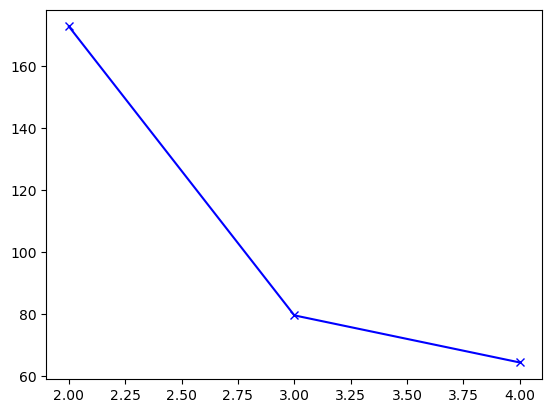

silhouetter score:0.533


In [61]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

data=pd.read_csv("C:\\Users\\prasanna\\OneDrive\\Desktop\\4thsem\\Part A\\4_kmeas_clustering_data.csv")
data.info()

Sum_of_squared_distances=[]
K=range(2,5)
for k in K:
    km=KMeans(n_clusters=k)
    km=km.fit(data)
    Sum_of_squared_distances.append(km.inertia_)
    
plt.plot(K,Sum_of_squared_distances,'bx-')
plt.show()

model_k=KMeans(n_clusters=3,random_state=42)
data_kmeans=model.fit(data)
data['cluster_labels']=data_kmeans.labels_
data.to_csv('cluster_labels.csv')

score=silhouette_score(data,model.labels_, metric='euclidean')
print('silhouetter score:%.3f' % score)


# decision tree

In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.metrics import classification_report, confusion_matrix

data=pd.read_csv("C:\\Users\\prasanna\\OneDrive\\Desktop\\4thsem\\Part A\\3_CART_Iris_data.csv")
data.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  100 non-null    float64
 1   SepalWidthCm   100 non-null    float64
 2   PetalLengthCm  100 non-null    float64
 3   PetalWidthCm   100 non-null    float64
 4   Species        100 non-null    object 
dtypes: float64(4), object(1)
memory usage: 4.0+ KB


In [77]:

model=DecisionTreeClassifier(max_depth=1,min_samples_leaf=3)
model=model.fit(data[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']],data.Species)


In [78]:
y=data['Species']

In [79]:
x=data.drop(['Species'] ,axis=1)

In [80]:
dt_feature_names=list(X.columns)
plt.figure(figsize=(10,8))
dt_target_names=[str(s) for s in y.unique()]

<Figure size 1000x800 with 0 Axes>

[Text(0.5, 0.75, 'Dependents_Yes <= 1.75\ngini = 0.5\nsamples = 100\nvalue = [50, 50]\nclass = Iris-versicolor'),
 Text(0.25, 0.25, 'gini = 0.168\nsamples = 54\nvalue = [49, 5]\nclass = Iris-versicolor'),
 Text(0.75, 0.25, 'gini = 0.043\nsamples = 46\nvalue = [1, 45]\nclass = Iris-virginica')]

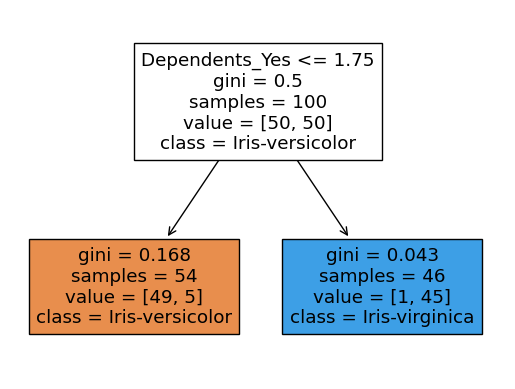

In [81]:
plot_tree(model,feature_names=dt_feature_names,class_names=dt_target_names,filled=True)

In [82]:
pred=model.predict(x)

In [83]:
print(confusion_matrix(y,pred))

[[49  1]
 [ 5 45]]


In [85]:
print(classification_report(y,pred))

                 precision    recall  f1-score   support

Iris-versicolor       0.91      0.98      0.94        50
 Iris-virginica       0.98      0.90      0.94        50

       accuracy                           0.94       100
      macro avg       0.94      0.94      0.94       100
   weighted avg       0.94      0.94      0.94       100

